In [129]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [130]:
# Loading the dataset
data_AFF = pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [131]:
# Inspecting the dataset
data_AFF.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [132]:
data_AFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [133]:
print(data_AFF.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [134]:
#Checking null values
print(data_AFF.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [135]:
# fixing spaces in columns names
data_AFF.columns=data_AFF.columns.str.strip()
data_AFF.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [136]:
# removing in necessary columns from dataset
data_AFF.drop(['day','month','year'],axis=1,inplace =True)

In [137]:
#EXPLORATORY DATA ANALYSIS

In [138]:
# Categories in classes
data_AFF['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [139]:
# Encoding of the categories in classes
data_AFF['Classes']=np.where(data_AFF['Classes'].str.contains("not fire"),0,1)

In [140]:
data_AFF.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [141]:
data_AFF['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [142]:
print(data_AFF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB
None


In [ ]:
#DATA VISUALIZATION AND OBSERVATIONS:


In [143]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


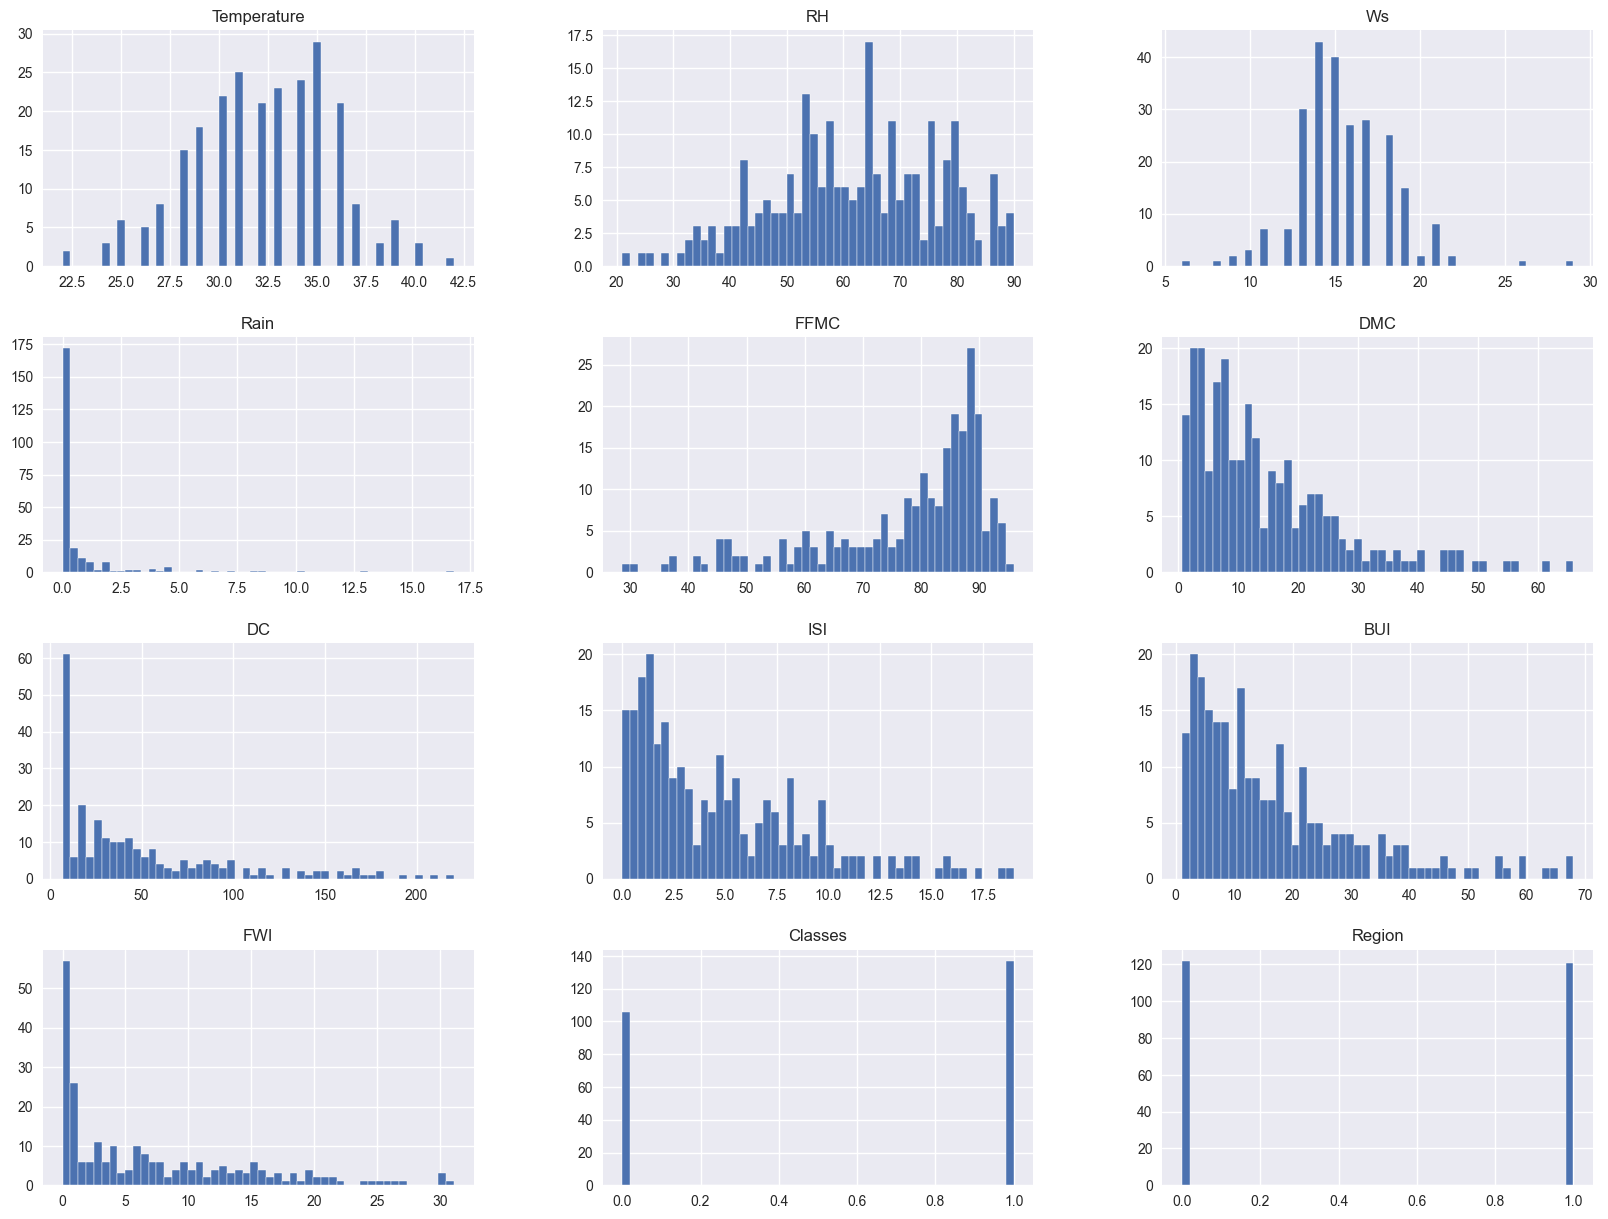

In [144]:
## Plot density plot for all features
plt.style.use('seaborn-v0_8')
data_AFF.hist(bins=50,figsize=(20,15))
plt.show()

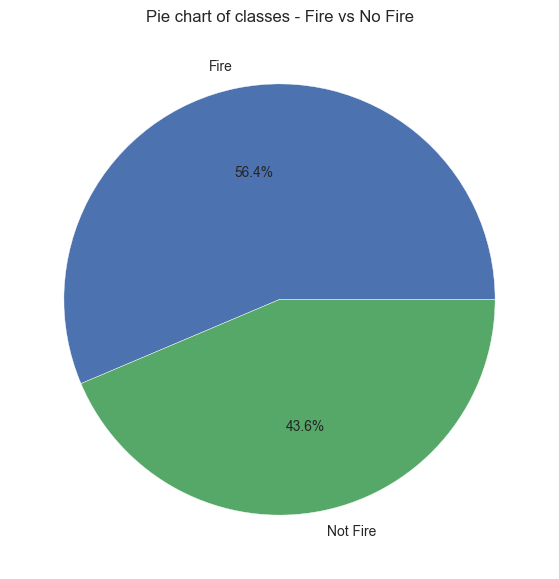

In [145]:
# Distribution of Classes in the data
percentage = data_AFF['Classes'].value_counts(normalize=True)*100

# plotting pie chart
classlabels =['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct="%1.1f%%")
plt.title("Pie chart of classes - Fire vs No Fire")
plt.show()

In [146]:
data_AFF.corr()   # calculates the correlation between all numerical columns in the DataFrame

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

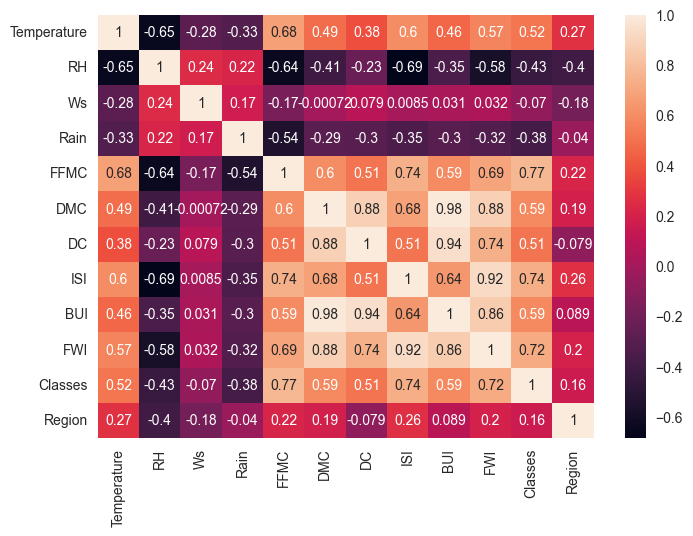

In [147]:
sns.heatmap(data_AFF.corr(),annot=True)

In [148]:
# Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [149]:
#MODEL TRAINING

In [150]:
#Training Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
# MODEL BUILDING

In [211]:
# Multiple Linear Regression
# Creating a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Multiple Linear Regression: MAE = {mae_linear:.2f}, R² = {r2_linear:.2f}")

Multiple Linear Regression: MAE = 0.47, R² = 0.99


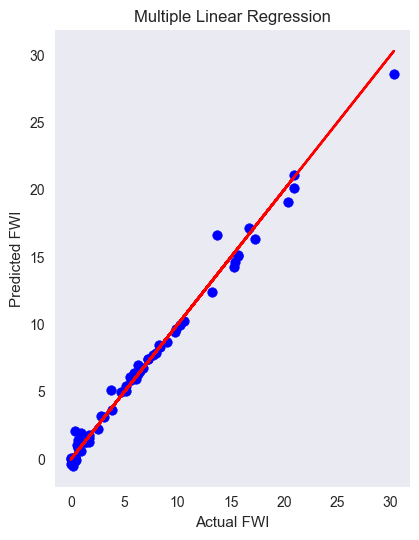

In [194]:
#Plot for Polynomial Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot(y_test, y_test, color='red')  # Line of perfect prediction
plt.title('Multiple Linear Regression')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.grid()

plt.tight_layout()
plt.show()

In [200]:
#Polynomial Regression
#Creating polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test_scaled)
y_pred_poly = poly_model.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression: MAE = {mae_poly:.2f}, R² = {r2_poly:.2f}")

Polynomial Regression: MAE = 0.53, R² = 0.98


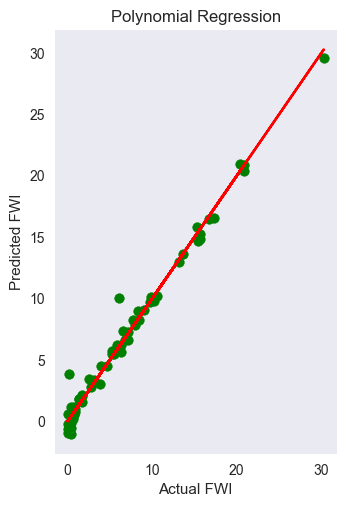

In [195]:
#Plot for Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green')
plt.plot(y_test, y_test, color='red')  # Line of perfect prediction
plt.title('Polynomial Regression')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.grid()

In [212]:
 #LASSO Regression with Hyperparameter Tuning
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_

# Predict and evaluate LASSO Regression
y_pred_lasso = best_lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Best LASSO Alpha: {grid_search_lasso.best_params_}")
print(f"LASSO: MAE = {mae_lasso:.2f}, R² = {r2_lasso:.2f}")

Best LASSO Alpha: {'alpha': 0.01}
LASSO: MAE = 0.47, R² = 0.99


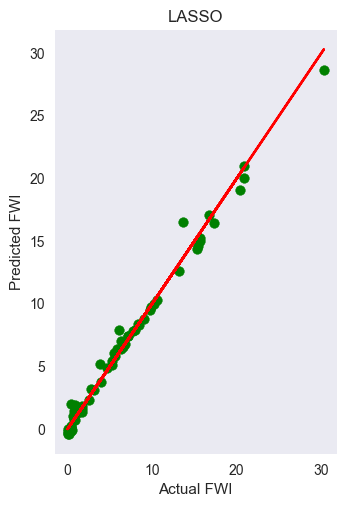

In [213]:
#Plot for LASSO
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot(y_test, y_test, color='red')  # Line of perfect prediction
plt.title('LASSO')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.grid()

In [214]:
#Ridge Regression with Hyperparameter Tuning
ridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_search_ridge.best_estimator_

# Predict and evaluate Ridge Regression
y_pred_ridge = best_ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Best Ridge Alpha: {grid_search_ridge.best_params_}")
print(f"Ridge: MAE = {mae_ridge:.2f}, R² = {r2_ridge:.2f}")

Best Ridge Alpha: {'alpha': 0.1}
Ridge: MAE = 0.47, R² = 0.99


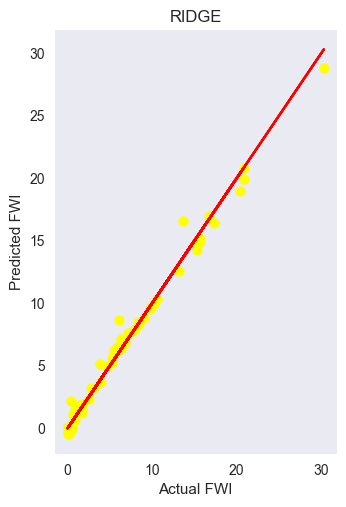

In [207]:
#Plot for RIDGE
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='yellow')
plt.plot(y_test, y_test, color='red')  # Line of perfect prediction
plt.title('RIDGE')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.grid()

In [209]:
#ELASTIC NET REGRESSION
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae_elastic=mean_absolute_error(y_test,y_pred)
r2_elastic=r2_score(y_test,y_pred)
print(f"ElasticNet Regression: MAE = {mae_elastic:.2f}, R² = {r2_elastic:.2f}")

ElasticNet Regression: MAE = 1.68, R² = 0.90


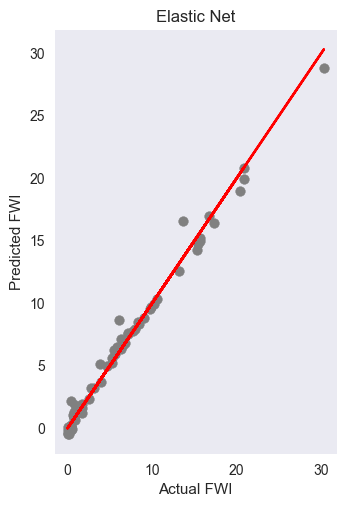

In [210]:
#Plot for Elastic Net
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='gray')
plt.plot(y_test, y_test, color='red')  # Line of perfect prediction
plt.title('Elastic Net')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.grid()